# Difusão do calor (Aula 27/10)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Condições iniciais

In [2]:
L = 1.0 # Comprimento da barra
T = 0.1
alpha = 0.01 # Coeficiente de difusão térmica
nx = 50    # Número de pontos na direção x
nt = 100 # Número de passos no tempo
dx = L / (nx - 1) # Delta x
dt = T / nt # Delta t

In [3]:
def initial_temp(xi):
    if 0.4 <= xi <= 0.6:
#         print ('Temperatura alta')
        return 1.0
    else:
#         print ('Temperatura zero')
        return 0.0

x = np.linspace(0, L, nx)
u_explicito = np.array([initial_temp(xi) for xi in x])

for n in range(nt):
    u_new = np.zeros(nx)

    for i in range(1, nx - 1):
        #Equação de difusão de calor: discretização temporal
        u_new[i] = u_explicito[i] + alpha * dt/dx**2 * (u_explicito[i-1] - 2*u_explicito[i] + u_explicito[i+1])
    u_explicito = u_new

Text(0.5, 1.0, 'Discretização temporal')

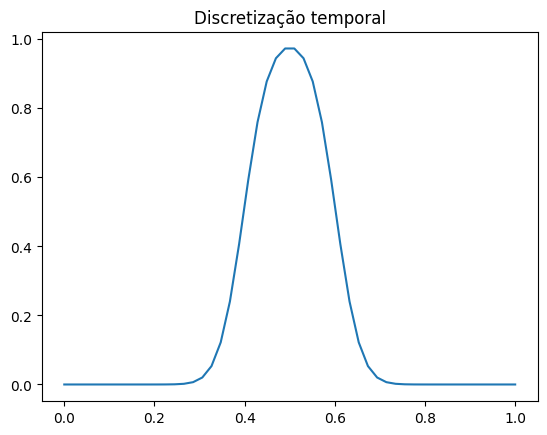

In [4]:
plt.plot(x, u_explicito, label = 'Discretização temporal')
plt.title('Discretização temporal')

# Propagação da onda em uma barra Unidimensional

## Condições iniciais

In [5]:
L = 1.0 # Comprimento da barra
T = 0.5
c = 1.0 # velocidade da onda
nx = 101   # Número de pontos na direção x
nt = 1000 # Número de passos no tempo
dx = L / (nx - 1) # Delta x
dt = T / nt # Delta t
c = 1.0

In [6]:
x = np.linspace(0, L, nx)
u = np.zeros((nx, nt + 1))
u[:,0] = np.sin(np.pi*x)
u[:,nt] = 0.0

for n in range(1, nt):
    for i in range(1, nx - 1):
        u[i, n+1] = 2*u[i,n] - u[i, n - 1] + (c*dt/dx)**2 * (u[i+1,n] - 2*u[i,n] +  u[i - 1,n]) #unidimensional

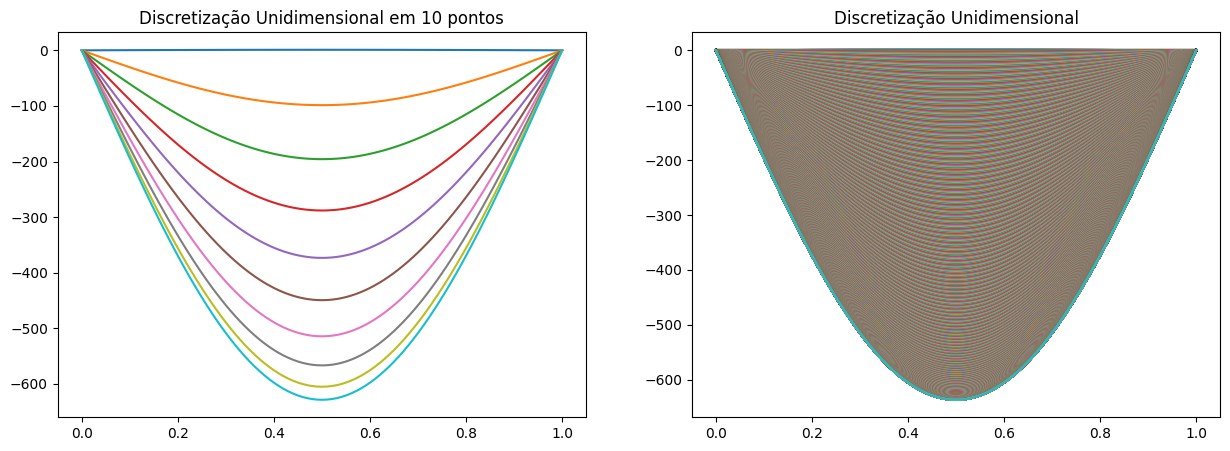

In [13]:
import matplotlib.pyplot as plt #For plotting

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15, 5))

for n in range(0, nt, int(nt/10)): # Definindo alguns pontos
    ax1.plot(x, u[:,n], label = 'Discretização temporal')
    ax1.set_title('Discretização Unidimensional em 10 pontos')
    ax2.plot(x, u, label = 'Discretização temporal')
    ax2.set_title('Discretização Unidimensional')